# Exercises - Working with Time Series Data

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

pip install vega_datasets     
You can use this library like so:

from vega_datasets import data     
data.sf_temps()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

from vega_datsets import data    
data.sf_temps()   
Use the above dataset for the exercises below:     

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. **Bonus:** Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [2]:
temps = data.sf_temps()
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
# must reset index to date and sort before can resample
temps = temps.set_index('date').sort_index()
temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


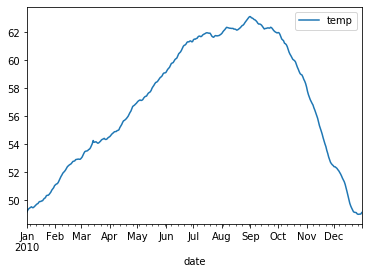

In [4]:
# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.
temps_day_avg = temps.resample('D').mean()
temps_day_avg.plot()

In [5]:
temps_day_avg.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


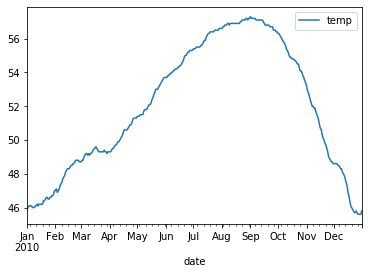

In [6]:
# 2. Write the code necessary to visualize the minimum temperature over time.
temps_min = temps.resample('D').min()
temps_min.plot()

In [7]:
temps_min.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


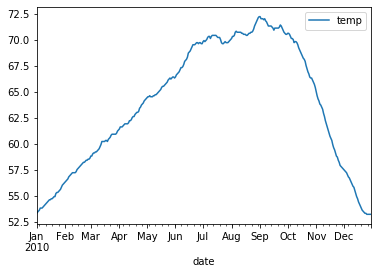

In [8]:
# 3. Write the code necessary to visualize the maximum temperature over time.
temps_max = temps.resample('D').max()
temps_max.plot()

In [9]:
temps_max.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


In [10]:
# 4. Which month is the coldest, on average?
temps_month = temps.resample('M').mean()
#temps_month.min()
# January is coldest month on average

In [11]:
# 5. Which month has the highest average temperature?
temps_month.max()
# September

temp    62.487083
dtype: float64

In [12]:
# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])).
min_max_day = pd.DataFrame(temps.resample('D').agg(['min', 'max', 'mean']))
min_max_day.head()

temp                 
             min   max       mean
date                             
2010-01-01  45.8  53.3  49.170833
2010-01-02  46.0  53.4  49.304167
2010-01-03  46.1  53.5  49.391667
2010-01-04  46.1  53.6  49.445833
2010-01-05  46.1  53.8  49.491667

In [13]:
# 6.a # Use this resampled dataframe to calculate the change in temperature for the day.
min_max_day['change'] = temps.resample('D').max() - temps.resample('D').min()
min_max_day.head()
# see Zach exercise review need bracket notation to subtract with new df

temp                  change
             min   max       mean       
date                                    
2010-01-01  45.8  53.3  49.170833    7.5
2010-01-02  46.0  53.4  49.304167    7.4
2010-01-03  46.1  53.5  49.391667    7.4
2010-01-04  46.1  53.6  49.445833    7.5
2010-01-05  46.1  53.8  49.491667    7.7

In [14]:
# 6.b Which month has the highest daily temperature variability?
min_max_day.resample('M').change.mean()
# September

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: change, dtype: float64

from vega_datasets import data    
data.seattle_weather()    
Use the dataset to answer the following questions:     

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [15]:
# 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, 
# i.e. the min, average, and maximum temperature should be 3 seperate lines.

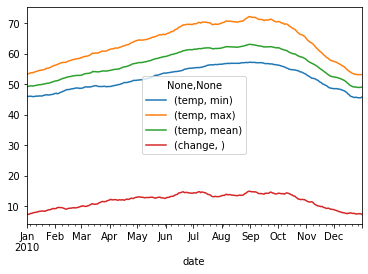

In [16]:
min_max_day.plot()

from vega_datasets import data     
data.seattle_weather()    

Use the dataset to answer the following questions:     

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [17]:
# get data
seattle = data.seattle_weather()
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [18]:
# set index as date and sort
seattle = seattle.set_index('date').sort_index()
seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
# Which year and month combination has the highest amount of precipitation?
seattle.resample('M').precipitation.max().idxmax()

Timestamp('2015-03-31 00:00:00', freq='M')

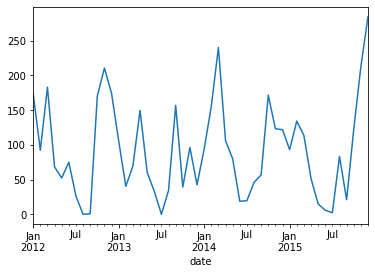

In [20]:
# Visualize the amount of monthly precipitation over time.
seattle.resample('M').precipitation.sum().plot()

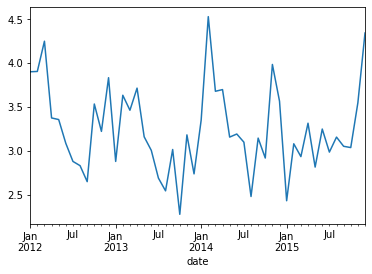

In [21]:
# Visualize the amount of wind over time. Choose a time interval you think is appropriate.
seattle.resample('M').wind.mean().plot()

In [22]:
# Which year-month combination is the windiest?
seattle.resample('M').wind.max().idxmax()

Timestamp('2012-12-31 00:00:00', freq='M')

In [23]:
# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
seattle.resample('Y')['weather'].apply(lambda x: (x == 'sun').sum())
# 2014
# https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [24]:
# In which month does it rain the most?
seattle2 = data.seattle_weather()
seattle2.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [25]:
seattle2['month'] = seattle2.date.dt.month
seattle2.head()

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [26]:
# interpreted as adding all the Marches together, Aprils together, etc. which has most rain?
# otherwise the answer is the same as first question, most precipitation of any month is March of 2015
seattle2.groupby('month')[['precipitation']].sum().idxmax()
# November

precipitation    11
dtype: int64

In [27]:
# Which month has the most number of days with a non-zero amount of precipitation?
seattle.resample('M')['precipitation'].apply(lambda x: (x != 0).sum()).idxmax()

Timestamp('2012-12-31 00:00:00', freq='M')

data.flights_20k()   

- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

In [28]:
# get data
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [29]:
# what is the data type of delay?
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [30]:
# are there null values in delay?
flights.isnull().sum()

date           0
delay          0
distance       0
origin         0
destination    0
dtype: int64

In [31]:
# Convert any negative delays to 0
del_replace = flights[flights.delay < 0]
flights.loc[flights.delay < 0, "delay"] = 0
flights.head()
# https://www.kite.com/python/answers/how-to-change-values-in-a-pandas-dataframe-column-based-on-a-condition-in-python

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


In [32]:
# set index so can resample
flights_dt = flights.set_index('date').sort_index()
flights_dt.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [33]:
# Which hour of the day has the highest average delay?
flights_dt.resample('H').mean()


,delay,distance
date,,
2001-01-01 00:00:00,14.000000,405.000000
2001-01-01 01:00:00,NaN,NaN
2001-01-01 02:00:00,NaN,NaN
2001-01-01 03:00:00,NaN,NaN
2001-01-01 04:00:00,NaN,NaN
...,...,...
2001-03-31 17:00:00,11.666667,512.888889
2001-03-31 18:00:00,12.538462,568.461538
2001-03-31 19:00:00,22.125000,526.375000


In [34]:
# df now has nulls, fillna as next step?
flights_dt = flights_dt.fillna(0)
flights_dt.isna().sum()

delay          0
distance       0
origin         0
destination    0
dtype: int64

In [35]:
# this is single highest delay value
flights_dt.sort_values('delay', ascending=False)

,delay,distance,origin,destination
date,,,,
2001-02-09 13:30:00,509,237,MCI,STL
2001-03-29 19:04:00,391,197,FLL,TPA
2001-02-09 12:20:00,370,405,MCI,MDW
2001-02-23 03:25:00,360,239,DAL,HOU
2001-01-28 18:20:00,333,484,JAX,BNA
...,...,...,...,...
2001-02-07 11:50:00,0,181,OKC,DAL
2001-02-07 12:00:00,0,337,OAK,LAX
2001-02-07 12:00:00,0,361,ONT,OAK


In [36]:
flights['hour'] = flights.date.dt.hour
flights.head()

,date,delay,distance,origin,destination,hour
0,2001-01-13 14:56:00,32,417,SAN,SJC,14
1,2001-01-31 16:40:00,0,1093,FLL,ISP,16
2,2001-02-11 18:39:00,3,293,LBB,DAL,18
3,2001-01-10 21:00:00,0,550,MSY,MCO,21
4,2001-03-30 21:45:00,0,229,STL,IND,21


In [37]:
flights.groupby('hour')[['delay']].mean()

,delay
hour,
0,127.916667
1,170.000000
3,302.500000
5,0.513514
6,2.494856
7,3.071932
8,4.030483
9,5.002504
10,5.850953


In [38]:
# Does the day of the week make a difference in the delay amount?
flights['day'] = flights.date.dt.day_name()
flights.head()

,date,delay,distance,origin,destination,hour,day
0,2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
1,2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2,2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
3,2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
4,2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [39]:
flights.groupby('day')[['delay']].mean()

,delay
day,
Friday,17.757596
Monday,7.165772
Saturday,8.431498
Sunday,10.413542
Thursday,12.821322
Tuesday,9.410866
Wednesday,11.032478


**Bonus** from vega_datasets import data      
data.iowa_electricity()       
- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total

In [40]:
iowa = data.iowa_electricity()
iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [41]:
# first create time series index
iowa = iowa.set_index('year').sort_index()
iowa.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


In [42]:
# resample by year? 
iowa_total = iowa.resample('Y').sum()
iowa_total.head(25)

,net_generation
year,
2001-12-31,40651
2002-12-31,42528
2003-12-31,42107
2004-12-31,43236
2005-12-31,44145
2006-12-31,45473
2007-12-31,49778
2008-12-31,53086
2009-12-31,51859


In [43]:
# rename column to total
iowa_total.columns = ['total_production']
iowa_total.head()

,total_production
year,
2001-12-31,40651
2002-12-31,42528
2003-12-31,42107
2004-12-31,43236
2005-12-31,44145


In [44]:
# from Corey 
# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
iowa = iowa.set_index(iowa.index.year)
# set index of total to be year like original
iowa_total = iowa_total.set_index(iowa_total.index.year)

In [45]:
# merge df?
df = iowa.join(iowa_total, how='outer')
df.head()

,source,net_generation,total_production
year,,,
2001,Fossil Fuels,35361,40651
2001,Nuclear Energy,3853,40651
2001,Renewables,1437,40651
2002,Fossil Fuels,35991,42528
2002,Nuclear Energy,4574,42528


1. Use the sf_temps dataset    
2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
4. Create pretty labels for time plots
5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [46]:
# 1. Use the sf_temps dataset
sf_temp = data.sf_temps()
sf_temp.shape

(8759, 2)

In [47]:
# 2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
sf_temp['temp_cat'] = pd.cut(sf_temp.temp, bins=[0, 50, 65, 80, 90], labels=['cold', 'cool', 'warm', 'hot'])
sf_temp.head()

,temp,date,temp_cat
0,47.8,2010-01-01 00:00:00,cold
1,47.4,2010-01-01 01:00:00,cold
2,46.9,2010-01-01 02:00:00,cold
3,46.5,2010-01-01 03:00:00,cold
4,46.0,2010-01-01 04:00:00,cold


In [48]:
# 3. How does the occurances of these 4 categories change month over month? 
# i.e. how many days have each distinction? 
# Visualize this and give the visual appropriate colors for each category.

# get data
sf_temp2 = data.sf_temps()
sf_temp2.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [49]:
# make this a time series index
sf_temp2 = sf_temp2.set_index('date').sort_index()

In [50]:
sf_temp2

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [51]:
# resample into average temp by day
sf_temp2 = sf_temp2.resample('D').mean()

In [52]:
sf_temp2.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


In [53]:
# create categorical bins
sf_temp2['bin'] = pd.cut(sf_temp2.temp, bins=[0, 50, 55, 65, 70], labels=['cold', 'cool', 'warm', 'hot'])

In [54]:
sf_temp2.head()

,temp,bin
date,,
2010-01-01,49.170833,cold
2010-01-02,49.304167,cold
2010-01-03,49.391667,cold
2010-01-04,49.445833,cold
2010-01-05,49.491667,cold


In [55]:
# check dispersal of values
sf_temp2.bin.value_counts()

warm    220
cool    113
cold     32
hot       0
Name: bin, dtype: int64

In [56]:
# add the month that each day is in
# NOTE: when the dataframe has a datetime index you do not need the .dt (because index is dt)
sf_temp2['month'] = sf_temp2.index.month
sf_temp2.head()

,temp,bin,month
date,,,
2010-01-01,49.170833,cold,1
2010-01-02,49.304167,cold,1
2010-01-03,49.391667,cold,1
2010-01-04,49.445833,cold,1
2010-01-05,49.491667,cold,1


In [57]:
# groupby month and count occurances of each category label

# sf_temp2.groupby('month')[['bin']].count()
# sf_temp2.groupby('month')[['bin']].sum()

# .count give us 30 or 31 labels for each month, .sum gives a list of smashed together words

# try get dummies so can sum?
df_dummies = pd.get_dummies(sf_temp2[['bin']])
sf_temp2 = pd.concat([sf_temp2, df_dummies], axis=1)
sf_temp2.head()

,temp,bin,month,bin_cold,bin_cool,bin_warm,bin_hot
date,,,,,,,
2010-01-01,49.170833,cold,1,1,0,0,0
2010-01-02,49.304167,cold,1,1,0,0,0
2010-01-03,49.391667,cold,1,1,0,0,0
2010-01-04,49.445833,cold,1,1,0,0,0
2010-01-05,49.491667,cold,1,1,0,0,0


In [58]:
sf_temp2.groupby('month')[['bin_cold', 'bin_cool', 'bin_warm', 'bin_hot']].sum()

,bin_cold,bin_cool,bin_warm,bin_hot
month,,,,
1,18,13,0,0
2,0,28,0,0
3,0,31,0,0
4,0,10,20,0
5,0,0,31,0
6,0,0,30,0
7,0,0,31,0
8,0,0,31,0
9,0,0,30,0


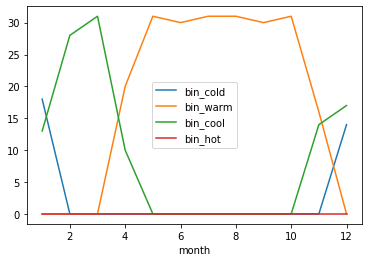

In [59]:
sf_temp2.groupby('month')[['bin_cold', 'bin_warm', 'bin_cool', 'bin_hot']].sum().plot()

In [60]:
# 4. Create pretty labels for time plots

In [61]:
# 5. Visualize the number of days of each month that fall into each bin by year 
# (e.g. x=month, y=n_days, hue=temp_bin) or st similar

Explore the birdstrikes dataset.     

df = data.birdstrikes()    

In [62]:
# bird =  data.birdstrikes()
# bird.head()
# this gives 404 error
# Zach work around is read from url
url = 'https://raw.githubusercontent.com/vega/vega-datasets/master/data/birdstrikes.csv'
pd.read_csv(url)

,Airport Name,Aircraft Make Model,Effect Amount of damage,Flight Date,Aircraft Airline Operator,Origin State,Phase of flight,Wildlife Size,Wildlife Species,Time of day,Cost Other,Cost Repair,Cost Total $,Speed IAS in knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1990-01-08,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1990-01-09,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1990-01-11,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1990-01-11,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1990-01-12,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,LAGUARDIA NY,A-319,None,2002-07-24,US AIRWAYS*,New York,Climb,Small,European starling,Day,0,0,0,NaN
9996,DALLAS/FORT WORTH INTL ARPT,MD-83,None,2002-07-24,AMERICAN AIRLINES,Texas,Descent,Small,Unknown bird - small,Day,0,0,0,250.0
9997,DENVER INTL AIRPORT,MD-82,None,2002-07-24,AMERICAN AIRLINES,Colorado,Take-off run,Small,Horned lark,Day,0,0,0,120.0
9998,BARKSDALE AIR FORCE BASE ARPT,B-52H,None,2002-07-25,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,110.0
